In [4]:
import  cv2
import os 

os.getcwd()

'd:\\KPay_detect'

In [205]:
image = cv2.imread(os.getcwd()+"\\kpay.jpg")
if image is None:
    print("Your directory is wrong")
else:
    print(f"Your path is correct")

Your path is correct


In [206]:
print("Image shape: ", image.shape)

Image shape:  (1280, 719, 3)


In [207]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

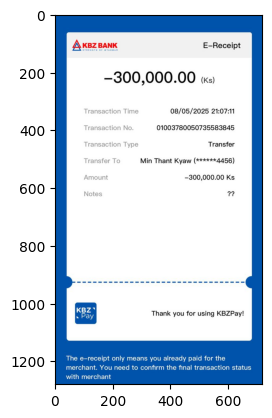

In [208]:
from matplotlib import pyplot as plt 

plt.imshow(img)

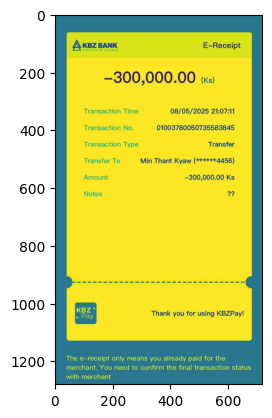

In [209]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)

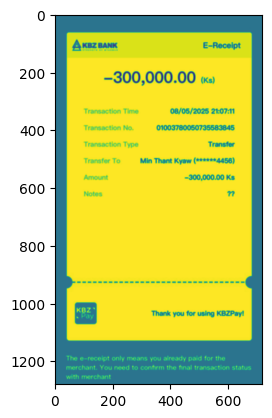

In [247]:
blur_image=  cv2.GaussianBlur(gray_image,(5,5),3)
plt.imshow(blur_image)

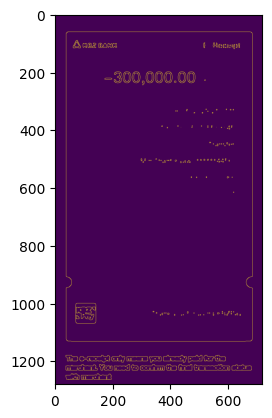

In [293]:
thresh = cv2.threshold(blur_image, 104, 150, cv2.THRESH_BINARY)[1]
gray = cv2.bilateralFilter(thresh, 1, 188, 260)

imgThreshold = cv2.Canny(gray, 1, 10,apertureSize=3)
plt.imshow(imgThreshold)

In [290]:
def reorder(myPoints):
    myPoints = myPoints.reshape((4, 2))
    myPointsNew = np.zeros((4, 1, 2), dtype=np.int32)
    add = myPoints.sum(1)

    myPointsNew[0] = myPoints[np.argmin(add)]
    myPointsNew[3] = myPoints[np.argmax(add)]
    diff = np.diff(myPoints, axis=1)
    myPointsNew[1] = myPoints[np.argmin(diff)]
    myPointsNew[2] = myPoints[np.argmax(diff)]

    return myPointsNew

[[[  42   62]]

 [[  39 1127]]

 [[ 678 1130]]

 [[ 682   66]]]

[array([[[  42,   62]],

       [[ 682,   66]],

       [[  39, 1127]],

       [[ 678, 1130]]], dtype=int32)]


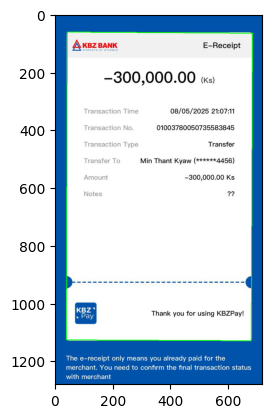

In [291]:
contours, hierarchy = cv2.findContours(imgThreshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rgb = img.copy()
rect_list = []

for i in contours:
    area = cv2.contourArea(i)

    if area > 8000:
        peri = cv2.arcLength(i, True)

        approx = cv2.approxPolyDP(i, 0.02 * peri, True)
        if len(approx) == 4:

            cv2.drawContours(rgb, [approx], -1, (0, 255, 0), 2)
            print(approx[:4])
            print()
            rect_list.append(reorder(approx[:4]))
print(rect_list)
plt.imshow(rgb)

In [288]:
crop_img = img.copy()

i = 1

rect_result = rect_list
rect_result

[array([[[  42,   62]],
 
        [[ 682,   66]],
 
        [[  39, 1127]],
 
        [[ 678, 1130]]], dtype=int32)]

In [215]:
print(len(rect_result))
print(rect_result)

1
[array([[[  43,   64]],

       [[ 679,   66]],

       [[  42, 1127]],

       [[ 675, 1129]]], dtype=int32)]


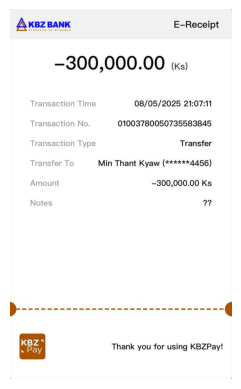

In [216]:
rect = rect_result[0] 
coords = rect.reshape(-1, 2)  # Shape: (4, 2)

xindexs = coords[:, 0]
yindexs = coords[:, 1]

x1, x2 = np.min(xindexs), np.max(xindexs)
y1, y2 = np.min(yindexs), np.max(yindexs)

x1, x2 = max(0, x1), min(crop_img.shape[1], x2)
y1, y2 = max(0, y1), min(crop_img.shape[0], y2)

cropped_img = crop_img[y1:y2, x1:x2, :]

plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
import easyocr
reader = easyocr.Reader(['en']) # english

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [218]:
bgr_image = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
results = reader.readtext(bgr_image)

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [219]:
results

[([[np.int32(50), np.int32(30)],
   [np.int32(178), np.int32(30)],
   [np.int32(178), np.int32(60)],
   [np.int32(50), np.int32(60)]],
  'KBZ BANK',
  np.float64(0.9870661200036525)),
 ([[np.int32(467), np.int32(29)],
   [np.int32(607), np.int32(29)],
   [np.int32(607), np.int32(65)],
   [np.int32(467), np.int32(65)]],
  'E-Receipt',
  np.float64(0.999162021536535)),
 ([[np.int32(123), np.int32(127)],
   [np.int32(453), np.int32(127)],
   [np.int32(453), np.int32(193)],
   [np.int32(123), np.int32(193)]],
  '-300,000.00',
  np.float64(0.8316878924315307)),
 ([[np.int32(458), np.int32(150)],
   [np.int32(516), np.int32(150)],
   [np.int32(516), np.int32(182)],
   [np.int32(458), np.int32(182)]],
  '(Ks)',
  np.float64(0.9999759197235107)),
 ([[np.int32(54), np.int32(260)],
   [np.int32(250), np.int32(260)],
   [np.int32(250), np.int32(284)],
   [np.int32(54), np.int32(284)]],
  'Transaction Time',
  np.float64(0.9904801318958751)),
 ([[np.int32(354), np.int32(258)],
   [np.int32(582), n

In [234]:
amount = results[2][1]
amount

'-300,000.00'

In [244]:
import re 

clean_amount = re.sub(r'\.00$', '', re.sub(r'[-,]', '', amount))
clean_amount

'300000'

In [ ]:
# path 
# load library
# declare
# read text
# extract text
# re